In [5]:
# !pip install pystan
# !pip install fbprophet

In [6]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [7]:
dct = {}
dct['codigo'] = 'soja'
# df = pd.read_pickle(f'/content/cepea-soja.p')
df = pd.read_pickle(f'../dados/cepea-{dct["codigo"]}.p')

In [8]:
df = pd.read_pickle(f'/content/cepea-soja.p')
df.index = pd.to_datetime(df.index)
df_train = df['2007-01-01' : '2018-12-31']
df_test = df['2019-01-01' : '2020-12-31']

In [9]:
def to_fb(df):
  df = df.drop(columns='preco_real', axis=1)
  df = df.reset_index()
  df.columns=['ds','y']
  return df

yreal = to_fb(df_test)
yfb = to_fb(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


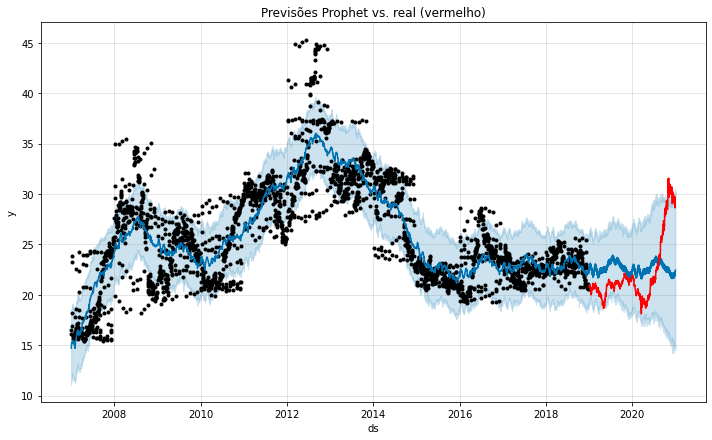

In [10]:
m = Prophet()
m.fit(yfb)

future = m.make_future_dataframe(periods=734)
forecast = m.predict(future)
fore = forecast.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

m.plot(fore) # Azul: Previsto
plt.title('Previsões Prophet vs. real (vermelho)')
plt.plot(yreal.ds.sort_values(), yreal.y, color='r') # Vermelho: Real

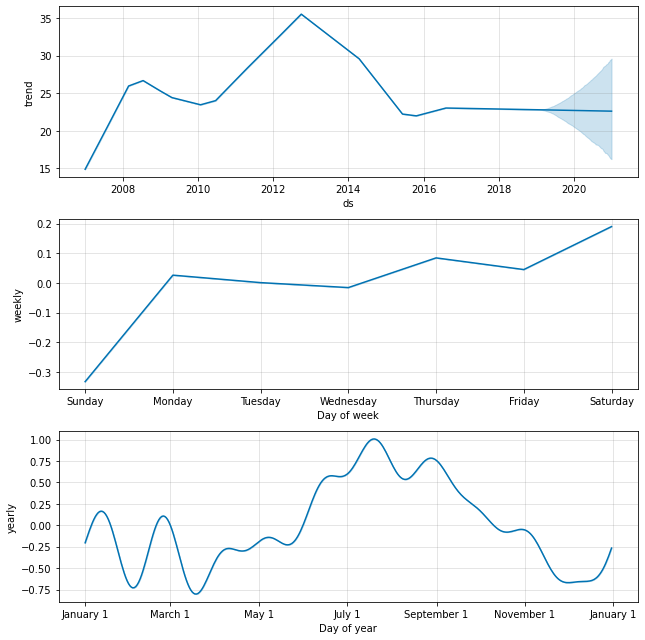

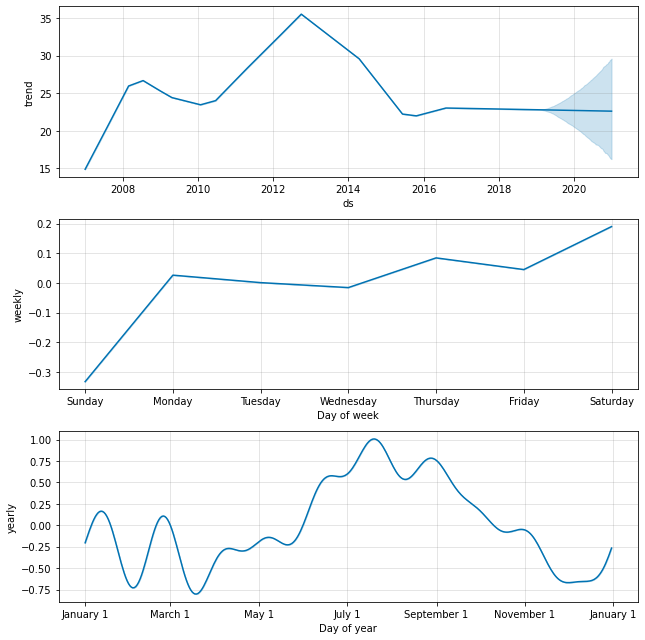

In [11]:
m.plot_components(forecast)

In [12]:
# Estatísticas de erro periodicidade diária
mae = mean_absolute_error(yreal.y, fore.yhat[-yreal.y.size:])
mae

2.729796192756211

---

In [13]:
# Recálculo com periodicidade mensal
dfp_mensal_train = df_train.resample('MS').mean()
dfp_mensal_test = df_test.resample('MS').mean()

yreal_mensal = to_fb(dfp_mensal_test)
yfb_mensal = to_fb(dfp_mensal_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


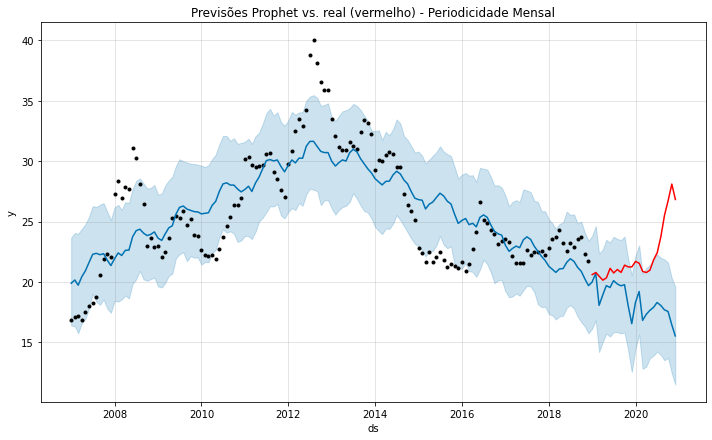

In [14]:
mm = Prophet()
mm.fit(yfb_mensal)

futurem = mm.make_future_dataframe(periods=24, freq="M")
forecastm = mm.predict(futurem)
forem = forecastm.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

mm.plot(forem) # Azul: Previsto
plt.title('Previsões Prophet vs. real (vermelho) - Periodicidade Mensal')
plt.plot(yreal_mensal.ds.sort_values(), yreal_mensal.y, color='r') # Vermelho: Real

In [15]:
# Estatísticas de erro periodicidade diária
mae_m = mean_absolute_error(yreal_mensal.y, forem.yhat[-yreal_mensal.y.size:])
mae_m

3.722511596414255